In [4]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [98]:
df=pd.read_csv('/content/movies.csv')

In [99]:
#let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [100]:
# let's see the missing values
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [101]:
# Data types for the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [102]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

#The 'errors='coerce'' argument tells Pandas to convert any values that cannot be parsed as numbers into NaN (Not-a-Number).

In [103]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

**Now , we need to extract the year from released column as 'year_corrected' column because the year in 'released ' and 'year' columns donot match for some rows. **

In [104]:
#Create correct year column

# 1.We split the 'released' column on ',' as you did initially using str.split(',').

# 2.Then, we use .str[1] to access the second part of the split (which contains the year).

# 3.Finally, we apply .str.strip() to remove any leading or trailing whitespace from the extracted year.

df['year_correct']=df['released'].astype(str).str.split(',').str[1].str.strip()

In [106]:
df['year_correct'].head()

0    1980 (United States)
1    1980 (United States)
2    1980 (United States)
3    1980 (United States)
4    1980 (United States)
Name: year_correct, dtype: object

In [107]:
#To extract the years "1980," "1994," and so on from the 'year_correct' column, you can use the .str.extract() method with a regular expression pattern.
#we use '.str.extract(r'(\d+)')' to extract one or more digits (\d+) from the 'year_correct' column.
#The regular expression pattern (\d+) captures one or more digits as a group.

df['year_correct']=df['year_correct'].str.extract(r'(\d+)')
df['year_correct'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: year_correct, dtype: object

In [108]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [109]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [111]:
pd.set_option('display.max_rows',None)

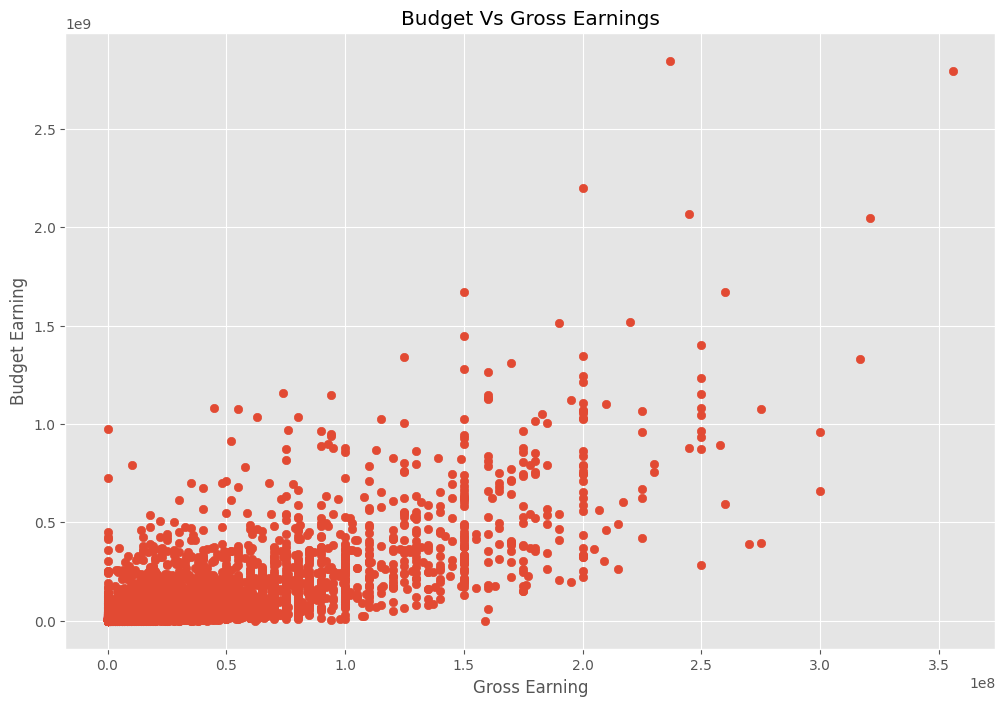

In [112]:

# scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget Earning')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

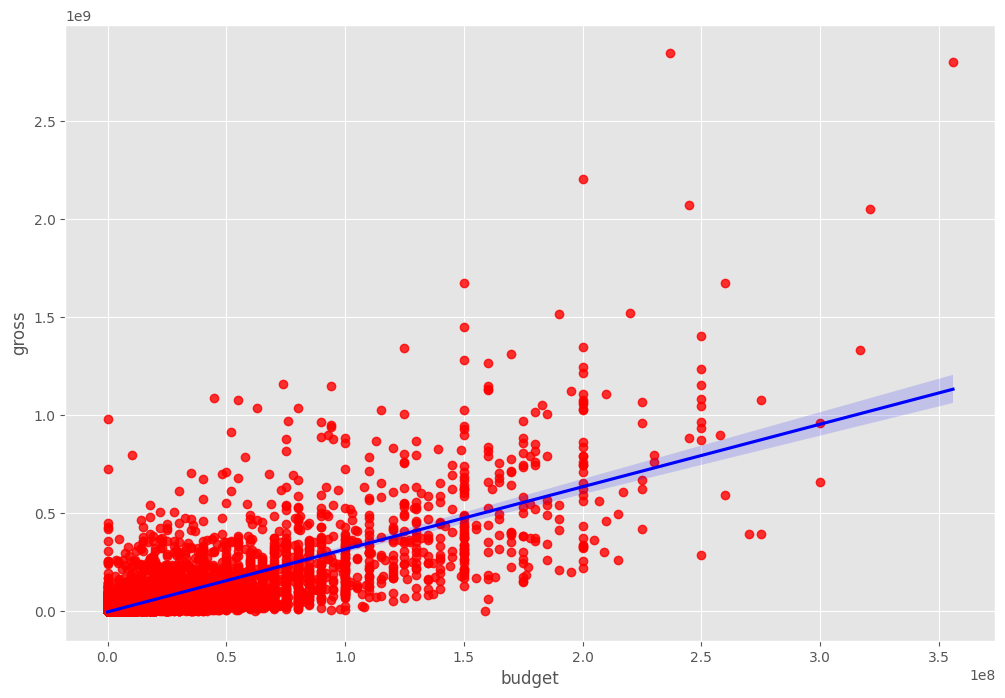

In [113]:
# let's see if gross and budget are correlated
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [114]:
#let's start looking at correlation
df.corr()#pearson is by default

<ipython-input-114-c3cd76b6a9b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()#pearson is by default


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [88]:
# Insight is high correlation between budget and gross

In [ ]:
df.corr(method='kendall')#kendall

In [ ]:
df.corr(method='spearman')

<ipython-input-115-e298e06274a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr(method='pearson')


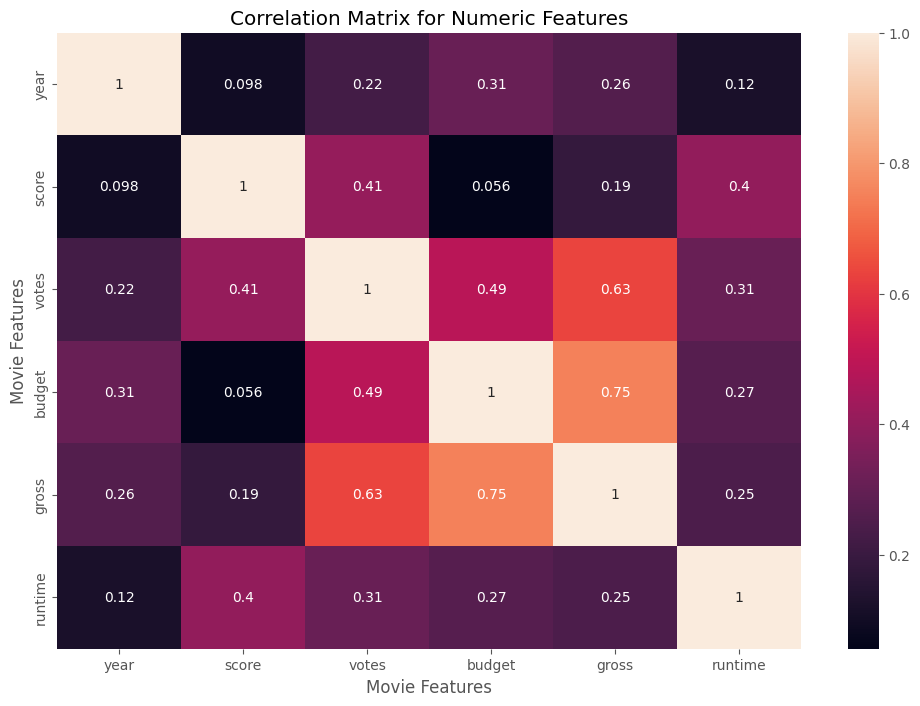

In [115]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [116]:
#let's look at Company(column in df)
# let's convert the object datatype columns to numerized columns to see the correlation


df_numerized=df
for col_name in df_numerized.columns:
  if (df_numerized[col_name].dtype=='object'):
    df_numerized[col_name]=df_numerized[col_name].astype('category')
    #If the column is categorical, this line converts it to a Pandas category data type using the ."astype('category')" method.
    #Categorical data types are more memory-efficient for storing and working with categorical variables.
    df_numerized[col_name]=df_numerized[col_name].cat.codes
    #After converting the column to a categorical data type, this line assigns integer codes to each category using the .cat.codes attribute.
    #This effectively replaces the original categorical values with numerical codes.
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


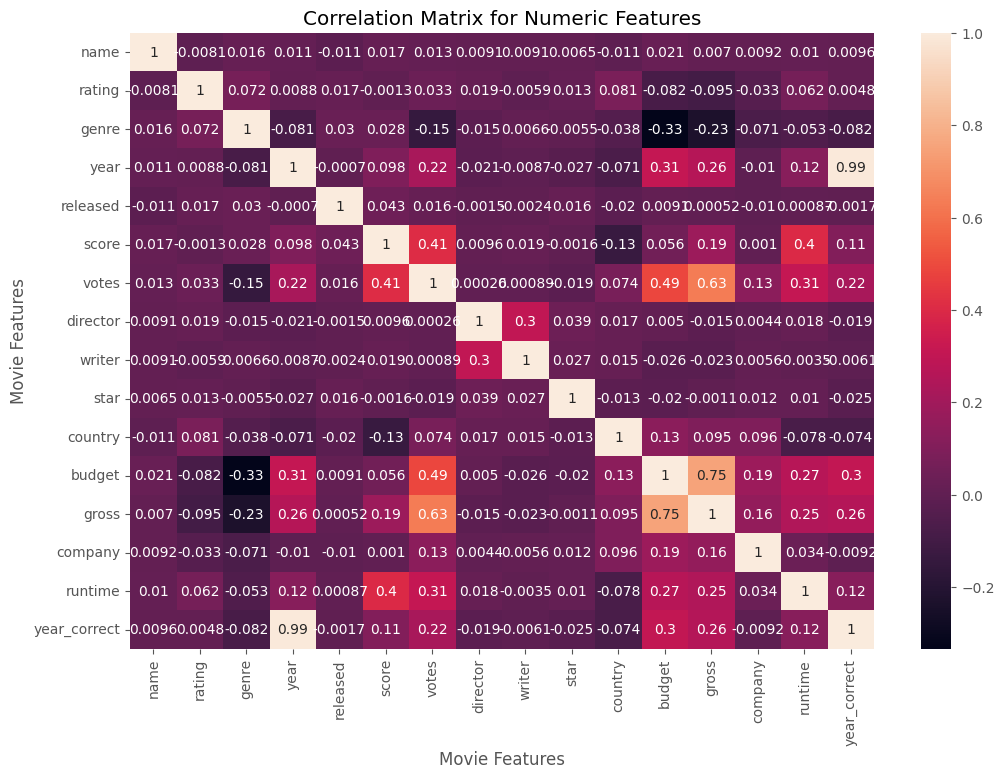

In [117]:
correlation_matrix=df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [118]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.009553
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.004829
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.082070
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.992136
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.001653
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105341
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.219954
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.018620
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.006134
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.025288


In [119]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              year_correct    0.009553
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

In [96]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
          votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.095450
gross     rating     -0.095450
budget    rating     -0.081939
rating    budget     -0.081939
year      genre      -0.081261
genre     year       -0.081261
runtime   country    -0.078412
country   runtime    -0.078412
genre     company    -0.071067
company   genre      -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
country   genre      -0.037615
genre     country    -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
writer    budget     -0.025911
budget    writer     -0.025911
gross     writer     -0.022997
writer    gross      -0.022997
director

In [97]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and gross have the highest correlation t gross earnings
